# CS 506 Spring 2021 - HW3
## Social Networks and Recommendataion Systems
#### Total: 25 Points

##### Package Limitations: None

### Name:
### BU ID:
### BU Email:
#### People you worked with on this hw:

### 1. Background

In this homework, you will try to recommend new collaborations to researchers of the Machine Learning community. Our approach will follow the guidelines of collaborative filtering: “**If your past behavior/preferences were similar to some other user’s, your future behavior may be as well**”. As an example, imagine you like Rolling Stones, Beatles and Jimmy Hendrix. It turns out that most people that like the aforementioned artists, are also fans of Eric Clapton. Then, it is very likely that if you listen to Eric Clapton’s music, you will like it as well.

In this assignment you will implement a **collaborative filtering recommendation system** for suggesting new collaborations to Machine Learning researchers.

**A network as a graph**: A graph or network represents relationships among different entities (users of a social network, researchers, products, etc.). Those entities are represented as nodes and the relationships between them (friends on Facebook, co-authors of a research paper, products purchased together) as edges. When there is an edge between two nodes, x and y, we say that y is a neighbor (or friend) of x (and also - as the graphs we consider are undirected - x is also a neighbor of y).

**Representing a graph in Python**: A widely used library in Python, for representing graphs is [NetworkX](https://networkx.github.io/documentation/stable/). You can read the documentation for more information on how to use this library.

### 2. Recommend new collaborations - The ML Community case 

In order to provide new collaborations and test the efficiency of the methods used, you are given two files (you can find them on piazza):

- ”old edges.txt”: In this file, every line contains the names of two re- searchers that have co-authored a paper in one of the top Machine Learn- ing conferences (NeurIPS, ICLR, ICML) between 2010 and 2016.
- ”new edges.txt”: In this file, every line contains the names of two re- searchers (from those existing in the above file) that formed a new (non- existing before) collaboration, in either 2017 and 2018.

With the first file in hand, you will answer the following question:
“For author X, list some non-collaborators in order, starting with the best col- laborator recommendation and ending with the worst”. A non-friend is a user who is not X and is not a collaborator of X. Depending on the recommendation algorithm you are going to choose, the list may include all non-collaborators or some of them.

Then, using the second file, with actual new collaborations formed in the next 3 years, you will test the efficiency of these algorithms.


### Tasks
a) [3 pts.] Write a function that reads the file “old edges.txt” and create a graph using NetworkX. (This is a tab-separated value (TSV) file, you may use packages such as Pandas to read it. )


In [1]:
import numpy as np 
from tqdm import tqdm

import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# You can add functions, inputs outputs to existing functions. 
# Please do NOT change name of the existing functions

from typing import Tuple, List, Dict, Callable
import networkx as nx

def read_old_edges(file_path: str) -> nx.Graph:
    """
    read old edges text file and return a NetworkX graph
    
    :param file_path: string file path to old_edges.txt
    :return: network graph instance of the graph
    """
    graph = nx.Graph() 
    with open(file_path, 'r') as filein:
        for line in tqdm(filein.readlines()):
            line = tuple(line.strip().split('\t'))
            graph.add_edge(*line)
    return graph

In [3]:
old_graph = read_old_edges('old_edges.txt')

100%|██████████| 15791/15791 [00:00<00:00, 822097.12it/s]


In [4]:
len(old_graph.nodes), len(old_graph.edges)

(6427, 15791)

Text(0.5, 1.0, 'Visualization of Old Edges')

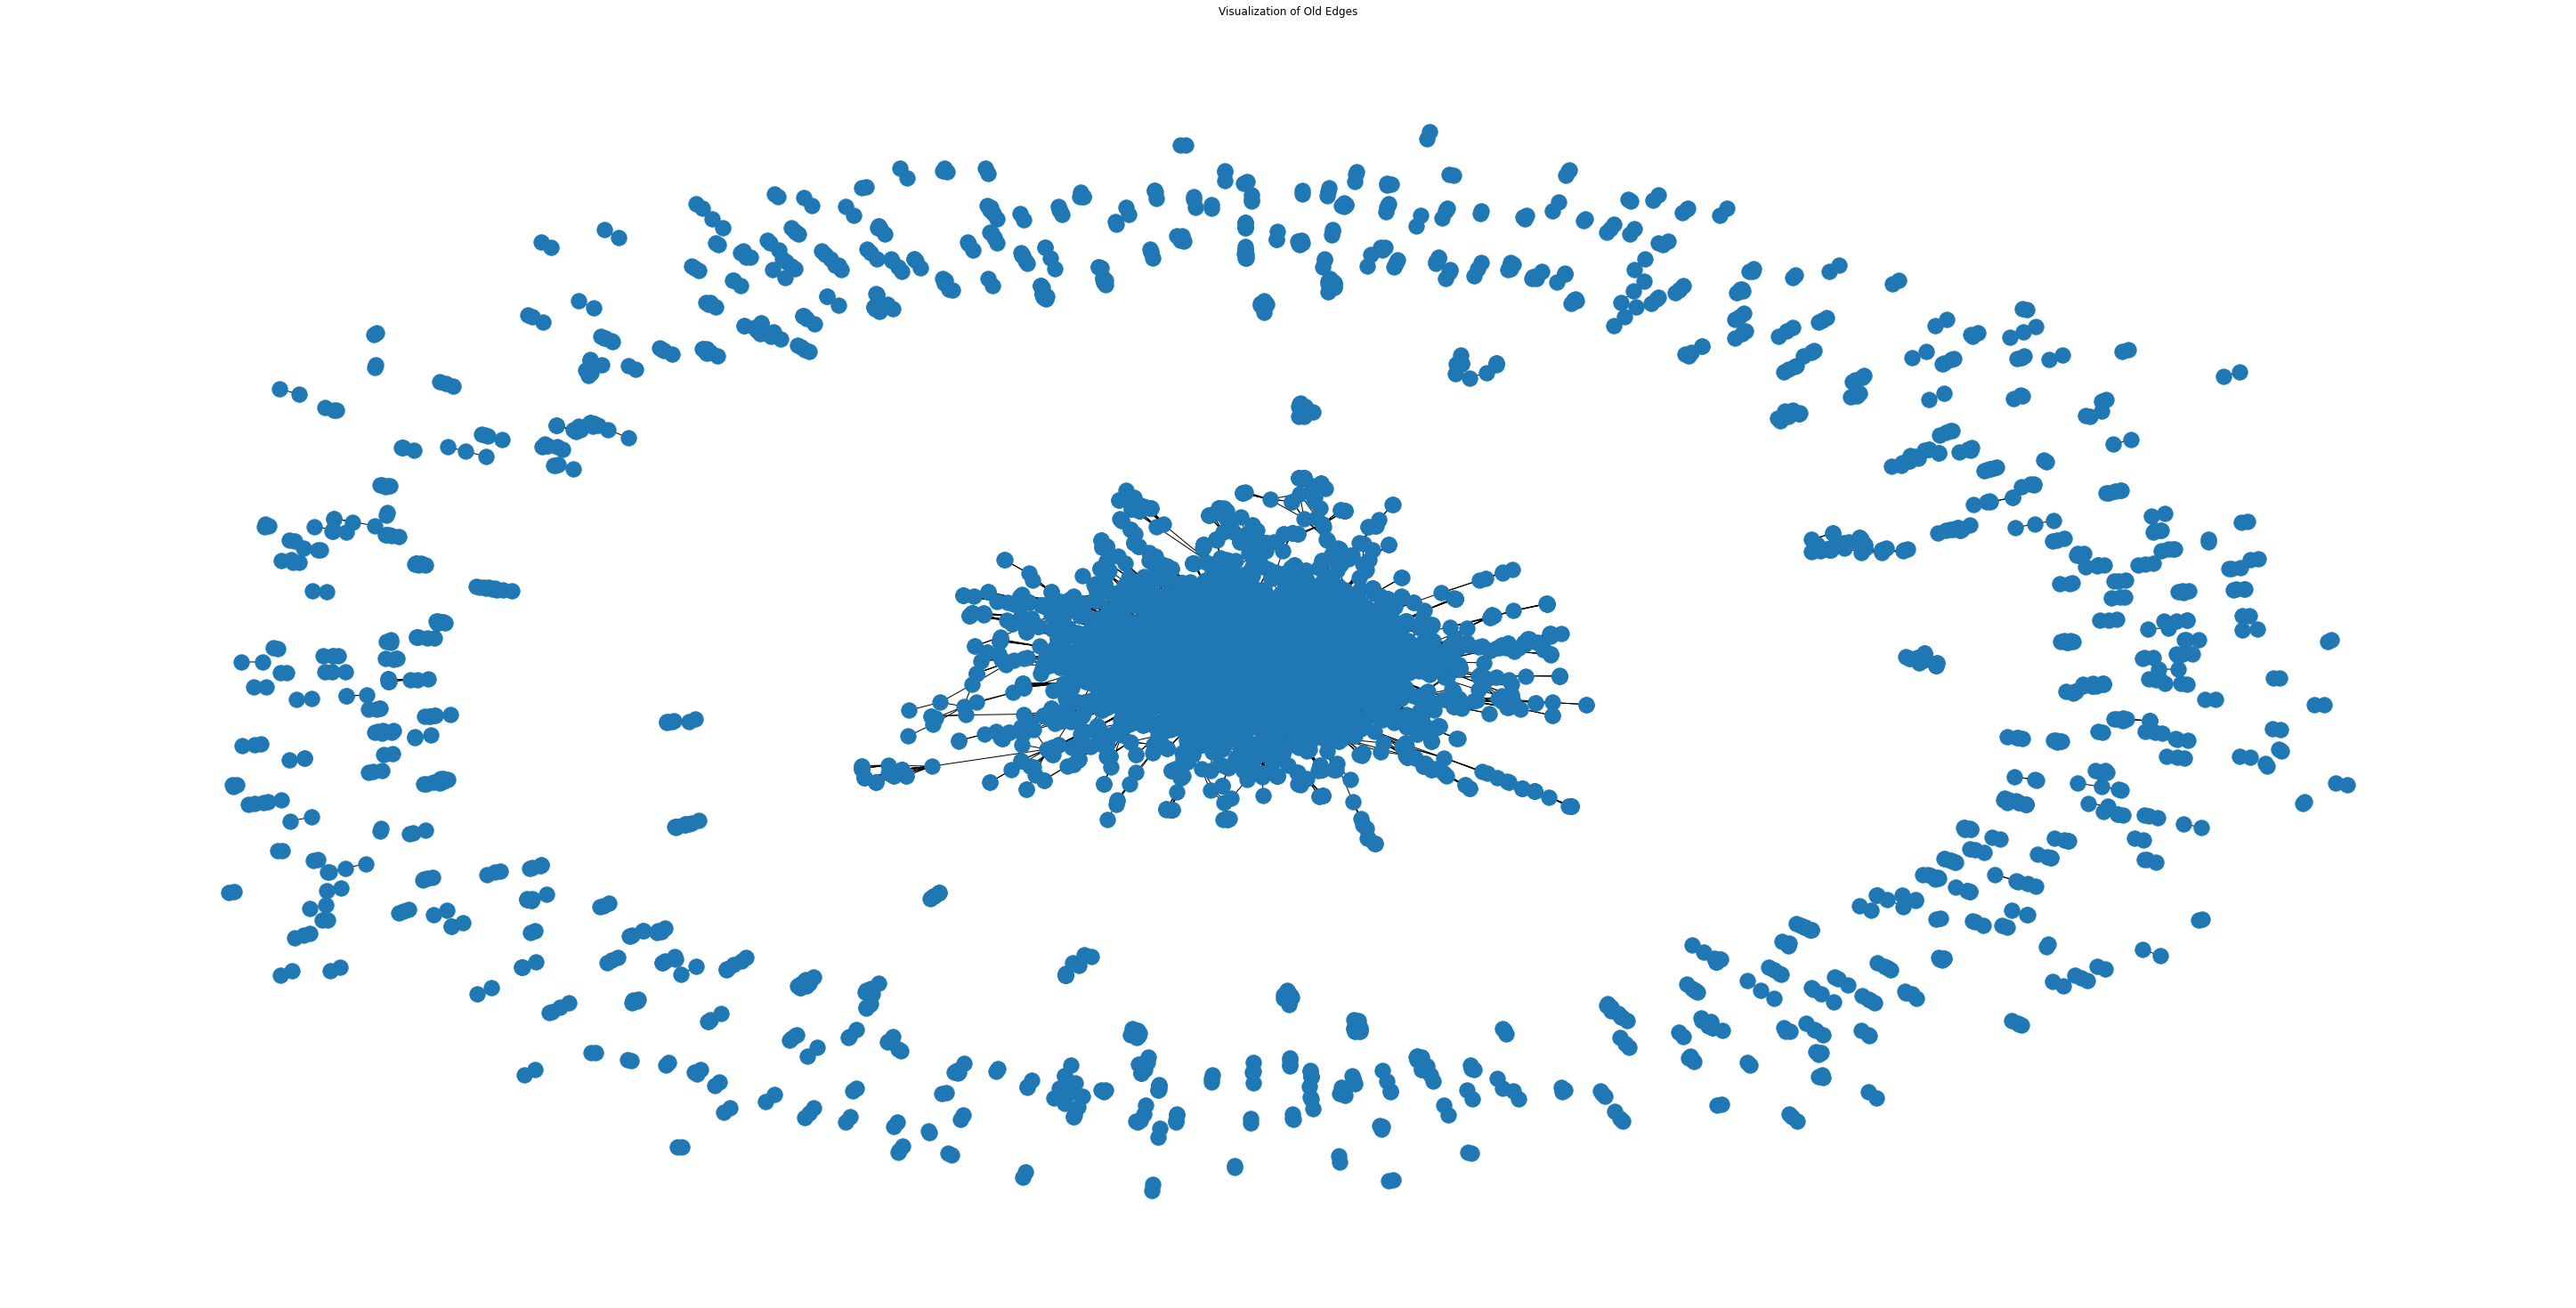

In [5]:
plt.figure(figsize=(40, 20))
nx.draw(old_graph)
plt.title('Visualization of Old Edges')

b) [3 pts.] Write a function that reads the file “new edges.txt” and for each author, keeps track of the new collaborations this user formed during 2017-2018.


In [6]:
def read_new_edges(file_path: str):
    """
    read new edges text file
    
    :param file_path: string file path to new_edges.txt
    :return: (you decide)
    """
    return read_old_edges(file_path)    

In [7]:
new_graph = read_old_edges('new_edges.txt')

100%|██████████| 1757/1757 [00:00<00:00, 840199.76it/s]


In [8]:
len(new_graph.nodes), len(new_graph.edges)

(1143, 1701)

Text(0.5, 1.0, 'Visualization of New Edges')

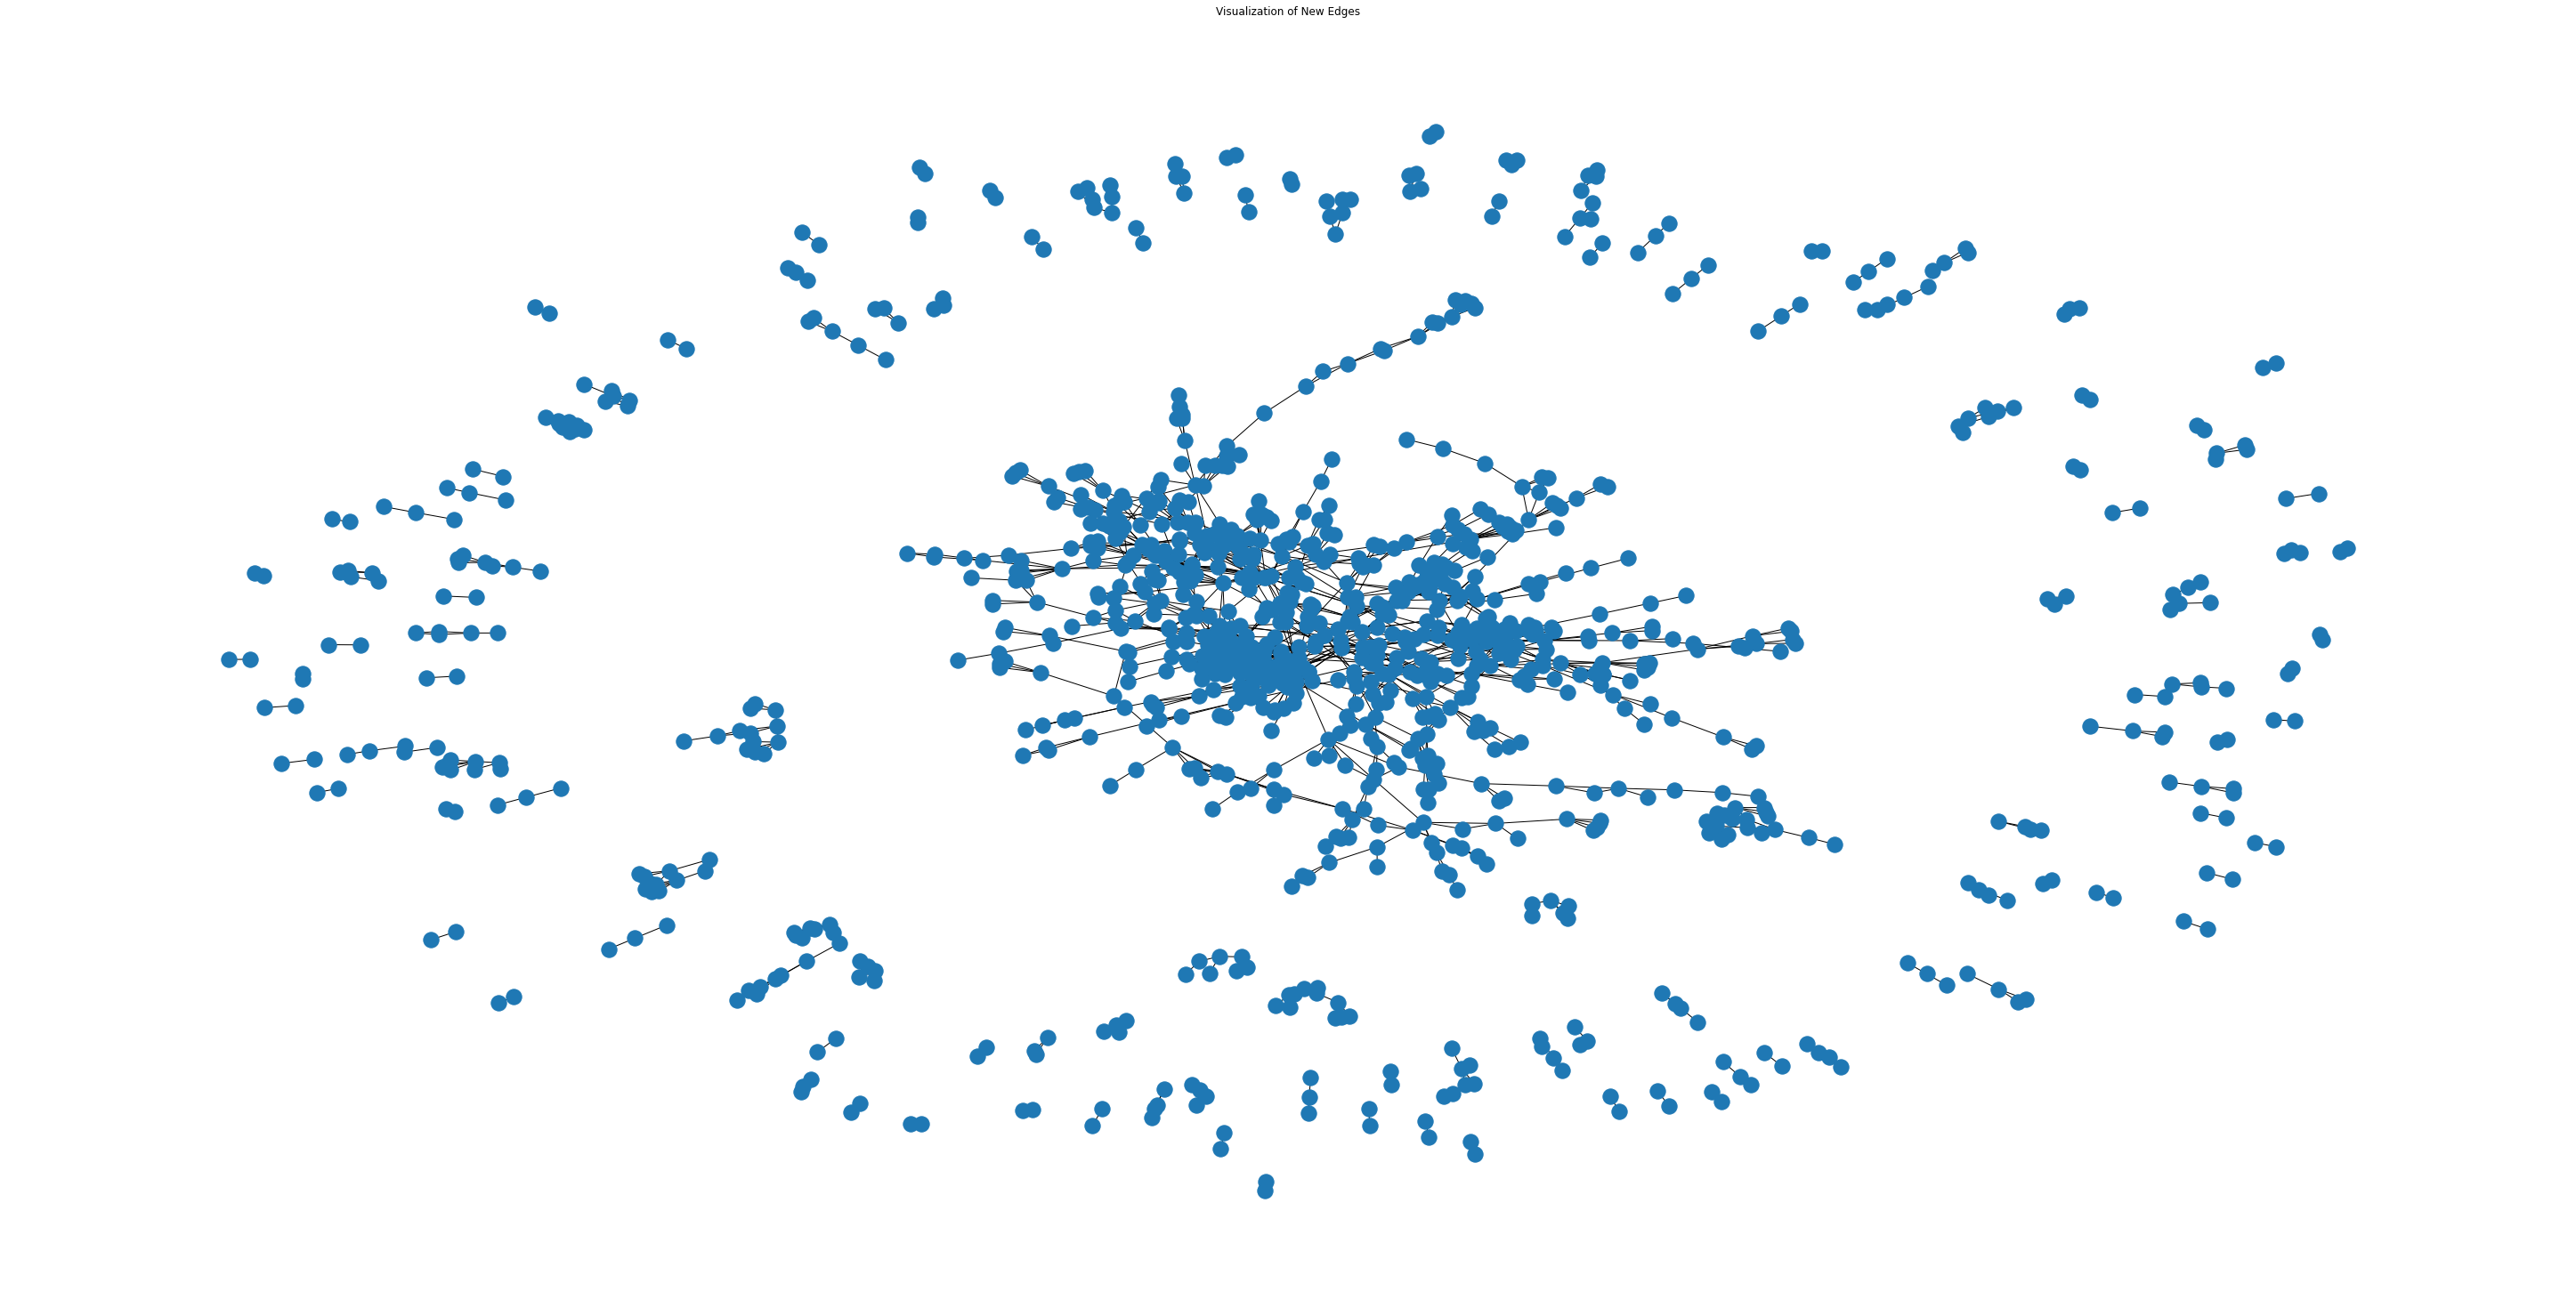

In [9]:
plt.figure(figsize=(40, 20))
nx.draw(new_graph)
plt.title('Visualization of New Edges')

In 2017 and 2018, there were 1,757 new edges formed between existing authors. For the next tasks, pick (and recommend new collaborations for) those authors that formed at least 10 new connections between 2017-2018. In the remaining, when we talk about author X, we refer to one of those authors.

c) [5 pts.] **Recommend by number of common friends**

The intuition behind this recommendation algorithm is that if non-friend Y is your friend’s friend, then maybe Y should be your friend too. If person Y is the friend of many of your friends, then Y is an even better recommendation. 

In [10]:
def common_friends_number(graph: nx.Graph, author) -> List[str]:
    """
    Return list of authors who have a common neighbor as 
    given author sorted by number of common friends. 
    
    :param graph: collaboration graph in nextworkX
    :return: list of new collaborators' name to recommend
    """
    all_nodes = list(graph.nodes)
    
    common_friends = [] # (name, percentage)
    author_neighbor = set(graph[author].keys())
    
    for each in all_nodes: 
        # ensure each is not already a neighbor of author 
        if each in author_neighbor:
            continue 
        each_neighbor = set(graph[each].keys())
        each_common_count = len(author_neighbor.intersection(each_neighbor))
        common_friends.append((each, each_common_count))  if each_common_count else None 
    # lambda declears anonymous function, where input is 'item', return 'item[1]'
    # tuple will be sorted by return of key, which is percentage
    common_friends.sort(key=lambda item: item[1], reverse=True)
    return common_friends

In [11]:
max(dict(old_graph.degree).items(), key=lambda item: item[1])

('Andrew Y. Ng', 80)

In [12]:
common_friends_number(old_graph, 'Andrew Y. Ng')[:20]

[('Andrew Y. Ng', 80),
 ('Tomas Mikolov', 4),
 ('Yoshua Bengio', 3),
 ('Ilya Sutskever', 3),
 ('Gregory S. Corrado', 3),
 ('Samy Bengio', 3),
 ('Aaron C. Courville', 2),
 ('Fei-Fei Li', 2),
 ('Tong Zhang 0001', 2),
 ('Andrea Frome', 2),
 ('Jonathon Shlens', 2),
 ('Romain Paulus', 2),
 ('Yuanqing Lin', 2),
 ('Abdel-rahman Mohamed', 1),
 ('Geoffrey E. Hinton', 1),
 ('Benjamin M. Marlin', 1),
 ('Percy Liang', 1),
 ('Roy Frostig', 1),
 ('Antonio Torralba 0001', 1),
 ('Aude Oliva', 1)]

d) [5 pts.] **Make recommendations using Jaccard’s Index**

If Γ(X) is the set of neighbors of X, then the metric we used in part (c), assigns to a non-friend y, the following recommendation score (with respect to X): score(y) = |Γ(X)∩Γ(y)|. Jaccard’s Index scales this score by taking into account the union of X and Y ’s neighbors. Intuitively, X and Y are more similar, if what they have in common is as close as possible to what they have together.


In [13]:
def jaccard_index(graph: nx.Graph, author) -> List[str]:
    """
    Return list of authors who have a common neighbor as 
    given author sorted by Jaccard Index (see pdf for equation) 
    
    :param graph: collaboration graph in nextworkX
    :return: list of new collaborators' name to recommend
    """
    all_nodes = list(graph.nodes)
    
    common_friends = [] # (name, percentage)
    author_neighbor = set(graph[author].keys())
    
    for each in all_nodes: 
        # ensure each is not already a neighbor of author 
        if each in author_neighbor:
            continue 
        each_neighbor = set(graph[each].keys())
        intersection_len = len(author_neighbor.intersection(each_neighbor))
        union_len = len(author_neighbor.union(each_neighbor))
        # intersection over union 
        common_friends.append((each, intersection_len/union_len)) if intersection_len else None 
    common_friends.sort(key=lambda item: item[1], reverse=True)
    return common_friends
    

In [14]:
jaccard_index(old_graph, 'Andrew Y. Ng')[:20]

[('Andrew Y. Ng', 1.0),
 ('Tomas Mikolov', 0.044444444444444446),
 ('Gregory S. Corrado', 0.03529411764705882),
 ('Samy Bengio', 0.030303030303030304),
 ('Ilya Sutskever', 0.026785714285714284),
 ('Yuanqing Lin', 0.024691358024691357),
 ('Andrea Frome', 0.023809523809523808),
 ('Jonathon Shlens', 0.023809523809523808),
 ('Romain Paulus', 0.022988505747126436),
 ('Fei-Fei Li', 0.021739130434782608),
 ('Yoshua Bengio', 0.0196078431372549),
 ('Aaron C. Courville', 0.01834862385321101),
 ('Tong Zhang 0001', 0.017543859649122806),
 ('Andrew M. Dai', 0.0125),
 ('Alnur Ali', 0.012345679012345678),
 ('Caiming Xiong', 0.012345679012345678),
 ('Stephen Merity', 0.012345679012345678),
 ('Christopher Potts', 0.012345679012345678),
 ('Chuan-Yung Tsai', 0.012345679012345678),
 ('David Vickrey', 0.012345679012345678)]

e)  [5 pts.] **Make recommendations using Adamic/Adar Index**

For part (c), we made recommendations using common neighbors. However, when assigning a score to Y , instead of just taking a count of the number of common neighbors, we take a weighted sum of them, where the weight of each common neighbor of X and Y , call her Z, is the inverse of the logarithm of the number of Z’s neighbors. In that way, we value more common neighbors that are more selective.

In [15]:
def adamic_adar_index(graph: nx.Graph, author) -> List[str]:
    """
    Return list of recommendations of a given author sorted 
    by Adamic / Adar Index (see pdf for equation) 
    
    :param graph: collaboration graph in nextworkX
    :return: list of new collaborators' name to recommend
    """
    
    all_nodes = list(graph.nodes)
    
    common_friends = [] # (name, percentage)
    author_neighbor = set(graph[author].keys())
    
    for each in all_nodes: 
        # ensure each is not already a neighbor of author 
        if each in author_neighbor:
            continue 
        each_neighbor = set(graph[each].keys())
        # find all Z using union
        union = author_neighbor.union(each_neighbor)
        # for each Z, calculate 1/log_e(number of neighbor)
        # do summation, to get adamic-adar index 
        index = sum(1/(np.log(len(graph[member]))) for member in union)
        common_friends.append((each, index)) if index != np.inf and index else None 
    common_friends.sort(key=lambda item: item[1], reverse=True)
    return common_friends

In [16]:
adamic_adar_index(old_graph, 'Andrew Y. Ng')[:20]

<ipython-input-15-42842fa1087a>:24: RuntimeWarning: divide by zero encountered in double_scalars
  index = sum(1/(np.log(len(graph[member]))) for member in union)


[('Michael I. Jordan', 79.86341732045521),
 ('Lawrence Carin', 78.19129779336113),
 ('Eric P. Xing', 75.46608911229774),
 ('Bernhard Schölkopf', 69.14067599572257),
 ('Jieping Ye', 63.22930671203385),
 ('Rémi Munos', 63.046704265943944),
 ('Pradeep Ravikumar', 62.652178006814324),
 ('Alexander J. Smola', 62.09141652466327),
 ('Inderjit S. Dhillon', 60.562302190731494),
 ('Ruslan Salakhutdinov', 60.05832127653223),
 ('Prateek Jain 0002', 58.850060321646076),
 ('David M. Blei', 58.68202025690765),
 ('Le Song', 58.457979966284405),
 ('Koray Kavukcuoglu', 57.915514364581576),
 ('Yann LeCun', 57.35812351995441),
 ('Ryan P. Adams', 57.34884173261526),
 ('Han Liu 0001', 57.13048442789403),
 ('Raquel Urtasun', 56.531107226094505),
 ('Pushmeet Kohli', 55.06787132887303),
 ('Rong Jin', 54.433716316030925)]

f) [4 pts.] **How good are the recommendations we make?** 

Previously, you implemented 3 functions, that given a user X provide recommendations for this user. In this task, you will check how good these recommendations are using the actual new connections formed during 2017-2018.

You will use two different ways, to calculate the efficiency of every approach:

- For each user X, take the 10 first recommendations for this user, and calculate the number of them that were actually formed during 2017-2018. You should report the average among users X.

- For each newly formed collaboration of user X, calculate the rank of this collaboration (the index where this new node Y appears in the recommendations list for X). Report the average among newly formed edges.

In [17]:
def top_k_recommendation_accuracy(old_graph: nx.Graph, new_graph, index_method: Callable, k=10) -> float:
    """
    Among top k recommendations of every user, return average number 
    of recommendations that becomes reality
    
    :param graph: collaboration graph in nextworkX
    :param index_method: function that is used to make recommendation
    :param new_edges: (you decide)
    :return: average accuracy of predictions among all users
    """
    
    percentages = []
    for each in new_graph:
        recommendations = index_method(old_graph, each)[1:k+1]
        names = set(item[0] for item in recommendations)
        new_edges = set(new_graph[each].keys())
        established_edges = len(names.intersection(new_edges))
        percentages.append(established_edges / k)
        
    return sum(percentages) / len(percentages)
    
    
def new_collaboration_rank(old_graph: nx.Graph, new_graph, index_method: Callable, k=10) -> float:
    """
    Among the new collaborations of every user, return average rank 
    of the collaboration calculated by the function
    
    :param graph: collaboration graph in nextworkX
    :param index_method: function that is used to make recommendation
    :param new_edges: (you decide)
    :return: average accuracy of predictions among all users
    """
    summary = [] 
    
    for each in new_graph: 
        each_new_edges = list(new_graph[each].keys())
        each_recommend = index_method(old_graph, each)[1:k+1]
        each_recommend = [item[0] for item in each_recommend]
        # use k if new link is not recommended, else respective index 
        #each_recommend_rank = [each_recommend.index(each_new_node) if each_new_node in each_recommend else k 
        #                       for each_new_node in each_new_edges]
        # discard node if not recommended
        each_recommend_rank = [each_recommend.index(each_new_node) 
                               for each_new_node in set(each_new_edges).intersection(set(each_recommend))]
        summary.append(sum(each_recommend_rank) / len(each_recommend_rank)) if each_recommend_rank else None 
    return sum(summary) / len(summary)

In [18]:
top_k_recommendation_accuracy(old_graph, new_graph, common_friends_number)

0.026159230096238054

In [19]:
new_collaboration_rank(old_graph, new_graph, common_friends_number, 10)

3.3935028248587567

In [20]:
degree = list(dict(new_graph.degree()).items())
degree.sort(key=lambda item: item[1], reverse=True)

In [21]:
degree[:100]

[('Razvan Pascanu', 28),
 ('Oriol Vinyals', 27),
 ('Demis Hassabis', 25),
 ('David Silver', 21),
 ('Pushmeet Kohli', 19),
 ('Nicolas Heess', 19),
 ('Karen Simonyan', 19),
 ('Peter Battaglia', 18),
 ('David P. Reichert', 18),
 ('Arthur Guez', 17),
 ('Michael I. Jordan', 16),
 ('Adrià Puigdomènech Badia', 16),
 ('Danilo Jimenez Rezende', 16),
 ('Rémi Munos', 16),
 ('Theophane Weber', 15),
 ('Adrian Weller', 14),
 ('Daan Wierstra', 14),
 ('Yujia Li', 14),
 ('Yee Whye Teh', 14),
 ('Aäron van den Oord', 14),
 ('Lars Buesing', 14),
 ('Le Song', 14),
 ('Miroslav Dudík', 12),
 ('Jascha Sohl-Dickstein', 12),
 ('Lihong Li 0001', 12),
 ('Tom Schaul', 12),
 ('Aaron C. Courville', 11),
 ('Alexander Pritzel', 11),
 ('Nando de Freitas', 11),
 ('Aarti Singh', 10),
 ('Tim Lillicrap', 10),
 ('Matthew Botvinick', 10),
 ('Alexandros G. Dimakis', 10),
 ('Percy Liang', 10),
 ('Yutian Chen', 10),
 ('Bo Dai', 10),
 ('David P. Woodruff', 10),
 ('Mohammad Norouzi 0002', 10),
 ('Nal Kalchbrenner', 10),
 ('Peter 

e) [**Bonus Question**] [2 pts.]
Doing some literature search, suggest your own algorithm for recommend- ing new links to a user X. Argue about the choice you make, why it makes sense to suggest users that way? How is the efficiency of this algorithm, compared to the ones you implemented in parts (c), (d) and (e)?